<h2><u>Step 2 - Exploratory Data Analysis of the Automobiles Dataset</h2></u>
The following tasks are carried out in this project:<br>
1. Explore and interpret correlations between features of the dataset<br>
2. Investigate which dataset features are good indicators of car price<br>
3. Create visualisation such as scatter plots with linear regression, boxplots and heatmaps<br>
4. Analyze patterns and run descriptive statistical analysis on dataset features<br>
5. Group dataset features based on identified parameters and create pivot tables<br>
6. Evaluate the statistical significance of the correlation of two variables using the P-Value<br>

In [146]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [147]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [148]:
#load data into a pandas dataframe
df = pd.read_csv(filepath)
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


<b><u>1. Investigating the correlation of continous numerical variables & linear regression plots</b></u><br>
The df.corr() function is used to identify the correlation coefficient between two variables.<br>
Then a linear regression plot is created for the two variables.<br>
Correlation of 1 = a perfect positive linear correlation.<br>
Correlation of 0 = No linear correlation.<br>
Correlation of -1 = Perfect negative linear correlation.<br>
Correlation does not imply causation.

In [149]:
df[["bore","stroke","horsepower"]].corr()

,bore,stroke,horsepower
bore,1.000000,-0.055390,0.566936
stroke,-0.055390,1.000000,0.098462
horsepower,0.566936,0.098462,1.000000


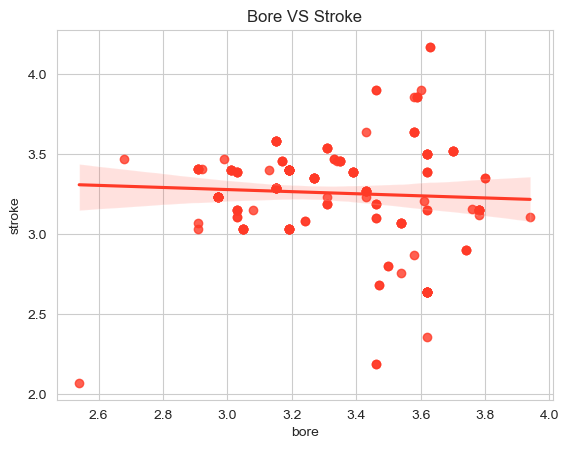

In [150]:
borevsstrokeplot = sns.regplot(y = "stroke", x = "bore", data = df, color = "#FF3A27")
sns.set_style("whitegrid")
borevsstrokeplot.set_title("Bore VS Stroke")
plt.show()

<i>The above shows:<br>
Very weak negative linear correlation between "bore" and "stroke".<br>
The value being close to zero suggests that there's almost no linear relationship between the variables with a very slight downward trend, though it is too weak to draw a meaningful conclusion.<br>

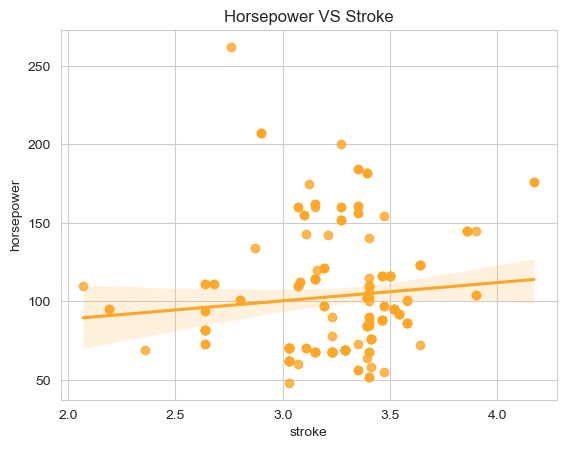

In [151]:
strokevshorsepowerplot = sns.regplot(y = "horsepower", x = "stroke", data = df, color = "#FFA627")
sns.set_style("whitegrid")
strokevshorsepowerplot.set_title("Horsepower VS Stroke")
plt.show()

The above regression plot shows a <i>moderate</i> positive correlation between "stroke" and "horsepower".<br> 
As stroke increases, horsepower tends to increase, but the relationship is not perfect and there are many outliers.<br>
There appears to be some association between stroke and horsepower, but changes in one variable may not directly cause changes in the other.

In [152]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


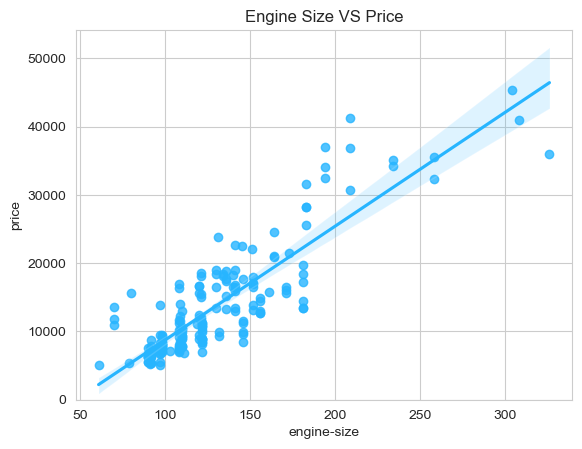

In [153]:
enginesizeplot = sns.regplot(y="price", x="engine-size", data=df, color="#27B5FF") 
sns.set_style("whitegrid")
enginesizeplot.set_title("Engine Size VS Price")
plt.ylim(0,)
plt.show()

The above shows a <i>strong</i> positive linear relationship between engine size and price of car.<br>
This indicates that the two variables move together closely, with little variability unaccounted for by the correlation.

In [154]:
df[["length", "price"]].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


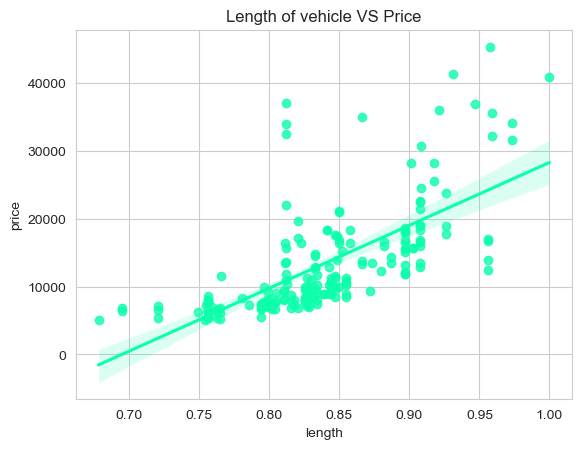

In [155]:
lengthvspriceplot = sns.regplot(y="price", x="length", data=df, color="#0CFFAB") 
sns.set_style("whitegrid")
lengthvspriceplot.set_title("Length of vehicle VS Price")
plt.show()

The above plot shows there is a moderate linear relationship between the two variables.

In [156]:
df[["wheel-base", "price"]].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


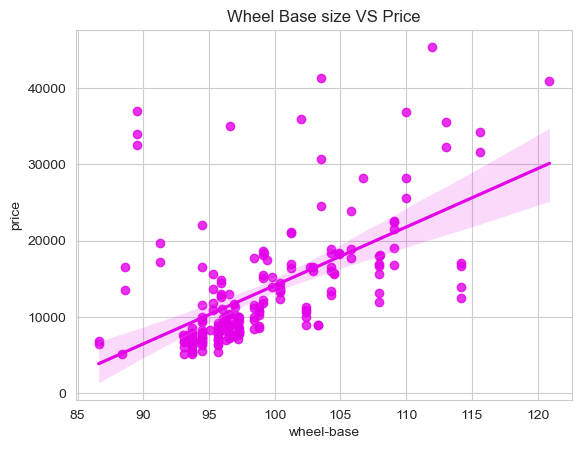

<Axes: title={'center': 'Wheel Base size VS Price'}, xlabel='wheel-base', ylabel='price'>

In [157]:
wheelbaseplot = sns.regplot(x = "wheel-base", y = "price", data = df, color = "#E300E9")
wheelbaseplot.set_title("Wheel Base size VS Price")
plt.show()
wheelbaseplot

The above plot shows there is a moderate positive correlation between wheel base and price,<br> however, there are many outliers, which is likely to skew the model.

<b><u>2. Analysis of categorical variables</u></b><br>
To analyse what features are good predictors of price, box plots can be used.

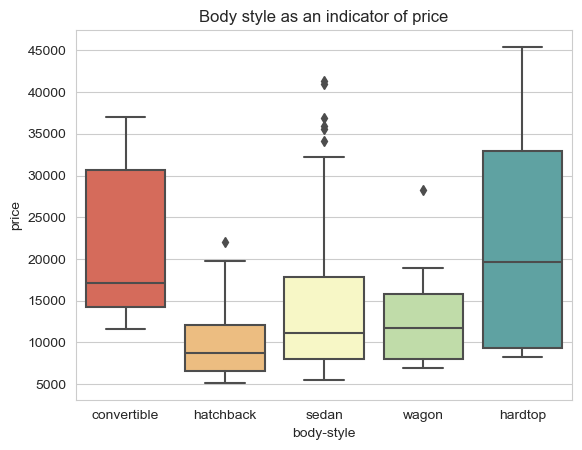

In [158]:
bodystyleboxplot = sns.boxplot(y = "price", x = "body-style", data = df, palette = "Spectral")
sns.set_style("darkgrid")
bodystyleboxplot.set_title("Body style as an indicator of price")
plt.show()

The above plot shows:<br>
Distributions of price between the different body style categories overlap significantly, therefore body style is not a good predictor of price.

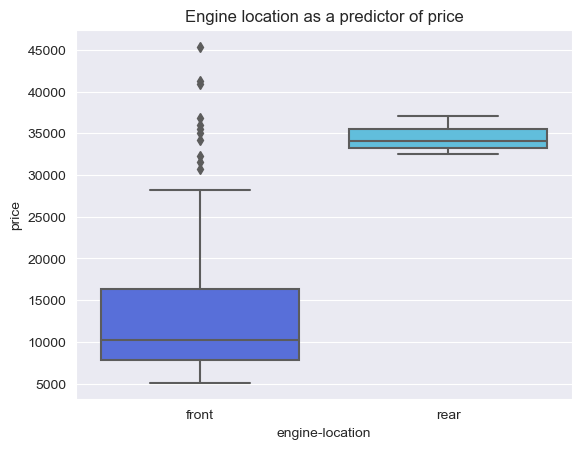

In [159]:
enginelocationboxplot = sns.boxplot(x = "engine-location", y = "price", data = df, palette = ["#4361EE", "#4CC9F0"] )
sns.set_style("darkgrid")
enginelocationboxplot.set_title("Engine location as a predictor of price")
plt.show()

The above plot shows:<br>
The distrbution of the two categories and distinct and do not overlap, therefore engine location is a good predictor of price. 

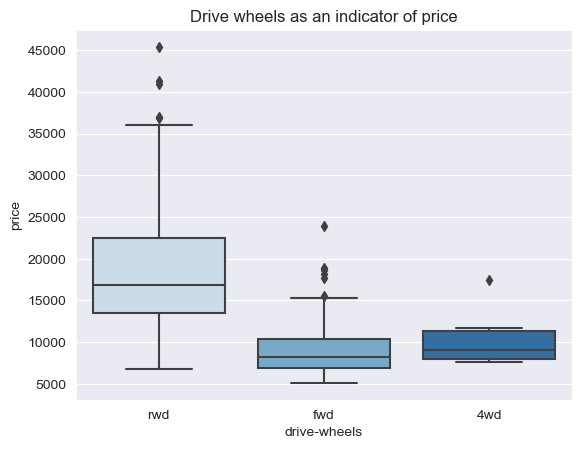

In [160]:
drivewheelsboxplot = sns.boxplot(x = "drive-wheels", y = "price", data = df, palette = "Blues")
sns.set_style("darkgrid")
drivewheelsboxplot.set_title("Drive wheels as an indicator of price")
plt.show()

The above plot shows:<br>
The distribution of price between the different categories differs, particularly between rwd and fwd, however there is little disctinction between fwd and 4wd, though the drive-wheels feature could could still potentially be a predictor of price.

<b><u>3. Descriptive Statistical Analysis</b></u><br>
Summarising and describing the main features of a dataset such as count, mean, standard deviaion, min and max values, QR/IQR

In [161]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [162]:
#The default setting of "describe" skips object type data. 
#The method can be applied to object data as follows:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [163]:
#VALUE COUNTS
#for value counts, use single [] not double, because it doesn't apply to dataframe, it applied to pandas series. 
df["fuel-system"].value_counts()

fuel-system
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [164]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [165]:
#create a new data frame to store the counts of a particular variable
drivewheelcount = df["drive-wheels"].value_counts().to_frame()
drivewheelcount.rename(columns={"drive-wheels":"drive-wheel-counts"}, inplace = True)
drivewheelcount

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [166]:
enginelocationcount = df["engine-location"].value_counts().to_frame()
enginelocationcount

,count
engine-location,
front,198
rear,3


The above code shows:<br>
Examing the counts in engine location, we see that engine location would not be a good predictor variable for price because there are only 3 cars with a rear engine and 198 with a front engine, so the result would be skewed.

<b><u>4. Grouping basics and the group by function</b></u><br>
The pandas "groupby" method allows for splitting a dataframe into groups, apply a function to each group independently, and then combine the results back together. <br>
The data is grouped based on two or more variables, and analysis is performed on the individual groups.

In [167]:
group1 = df[['drive-wheels','price']]
group1 = group1.groupby(['drive-wheels'],as_index=False).mean()
group1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


The above shows:<br>
On average, rear wheel drive cars are the most expensive.

In [168]:
newdf_group = df[['drive-wheels','body-style','price']]
groupeddf = newdf_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
groupeddf

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


The above shows the follow insights:<br>
1. Rear wheel drive hardtops are the most expensive on average overall followed closely by convertibles.
2. 4 wheel drive hatchbacks are the least expensive on average overall. 
3. Hatchbacks are the cheapest type of 4 wheel drive.
4. There are no 4 wheel drive hardtops.
5. Covertibles are the most expensive front wheel drive body style on average.

<b>Using pivot tables</b><br>
Pivot tables are used to restructure and summarize data from a dataframe based on specific criteria. 
They are used to explore and visualize data patterns. They enable you to transform data into a more comprehensible format for reporting purposes.
<br> code for pivot tables example: pivot_result = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')<br>
The index will be the rows of the pivot table.


In [169]:
newdf_group = df[['drive-wheels','body-style','price']]
groupeddf = newdf_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
groupeddf

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [170]:
grouped_pivot = groupeddf.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [171]:
# #Use the "groupby" function to find the average "price" of each car based on "body-style".
bodyavgprice= df[["body-style","price"]]
grouped_bodyavgprice = bodyavgprice.groupby(['body-style'],as_index= False).mean()
grouped_bodyavgprice

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<b>Using a heatmap to visualize the relationship between Body Style, Drive Wheel and Price.</b>

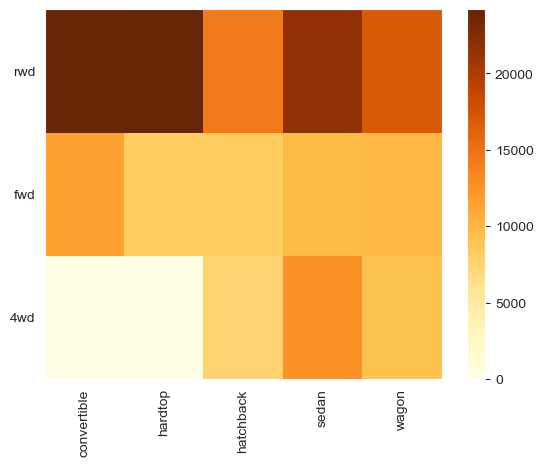

In [172]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='YlOrBr')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<b> P Value </b><br>
The P-value is the probability that the correlation between two variables is statistically significant. <br>
A significance of 0.05 means that we are 95% confident that the correlation between the variables is significant.

p-value  <0.001: strong evidence that the correlation is significant.<br>
p-value <0.05: moderate evidence that the correlation is significant.<br>
p-value <0.1: there is weak evidence that the correlation is significant.<br>
p-value >0.1: there is no evidence that the correlation is significant.<br>

The SciPy stats.pearsonr() function returns the Pearson correlation and the P-value.

In [173]:
corr, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print("Pearson correlation =",corr,"\n", "P-Value =", p_value)

Pearson correlation = 0.584641822265508 
 P-Value = 8.076488270732885e-20


<i>The correlation is 0.58, suggesting a moderate positive linear relationship.<br>
The P value is <0.001, suggesting strong statistical significance.

In [174]:
corr, p_value = stats.pearsonr(df["length"], df["price"])
print("Pearson correlation =",corr,"\n", "P-Value =", p_value)

Pearson correlation = 0.690628380448364 
 P-Value = 8.016477466158868e-30


<i>The correlation is 0.69, suggesting a moderate positive linear relationship.<br>
The P value is <0.001, suggesting strong statistical significance.

In [175]:
corr, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print("Pearson correlation =",corr,"\n", "P-Value =", p_value)

Pearson correlation = -0.704692265058953 
 P-Value = 1.749547114447557e-31


<i>The correlation is -0.70, suggesting a moderately strong negative linear relationship.<br>
The P value is <0.001, suggesting strong statistical significance.

In [176]:
corr, p_value = stats.pearsonr(df["normalized-losses"], df["price"])
print("Pearson correlation =",corr,"\n", "P-Value =", p_value)

Pearson correlation = 0.13399873429274337 
 P-Value = 0.05789749352703129


<i>The correlation is 0.13, suggesting a very weak/almost no positive linear relationship.<br>
The P value is 0.057, suggesting moderate statistical significance.

<h2><u>Conclusions</h2></u>
We now have a better understanding of the data, and which variables are important when predicting car price. <br>
From the analysis, we can conclude that the following variables are good predictors of car price:

<u>Continuous numerical variables:</u><br>
Length,
Width,
Curb-weight,
Engine-size,
Horsepower,
City-mpg,
Highway-mpg,
Wheel-base,
Bore,
<br>
<u>Categorical variables:</u><br>
Drive-wheels<Br>